In [1]:
#### DATA Collection

import pandas_datareader as pdr


In [2]:
df = pdr.DataReader('AAPL', 'yahoo', start='2012-11-09', end='2022-11-09')

In [3]:
df.to_csv("AAPL.csv")

In [56]:
df.head(10)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-11-08,20.079643,19.117500,20.022499,19.205357,1.056146e+09,16.516375
2012-11-09,19.817142,19.061428,19.300714,19.537857,9.299136e+08,16.802319
2012-11-12,19.803572,19.237499,19.791071,19.386786,5.158020e+08,16.672400
2012-11-13,19.660000,19.155714,19.246786,19.389286,5.329492e+08,16.674553
2012-11-14,19.551786,19.149286,19.482143,19.174286,4.771704e+08,16.489647
2012-11-15,19.267857,18.665001,19.197500,18.772142,7.899108e+08,16.143808
2012-11-16,18.928572,18.062500,18.757143,18.845715,1.266894e+09,16.207085
2012-11-19,20.267857,19.281429,19.311071,20.204643,8.233176e+08,17.375748
2012-11-20,20.426786,19.806429,20.425358,20.032499,6.427540e+08,17.227707


In [5]:
df.describe()

,High,Low,Open,Close,Volume,Adj Close
count,2519.000000,2519.000000,2519.000000,2519.000000,2.519000e+03,2519.000000
mean,61.343455,60.000620,60.661409,60.695862,1.790924e+08,58.878104
std,48.619220,47.381367,47.991830,48.023067,1.388024e+08,48.538964
min,14.271429,13.753571,13.856071,13.947500,4.100000e+07,12.064590
25%,26.745000,26.275000,26.506250,26.486250,9.368730e+07,24.257392
50%,40.185001,39.522499,39.877499,39.939999,1.329048e+08,37.871319
75%,80.841248,79.314999,80.031250,79.855000,2.119068e+08,78.533607
max,182.940002,179.119995,182.630005,182.009995,1.460852e+09,180.959747


In [6]:
df1=df.reset_index()['Close']
df1.shape

(2519,)

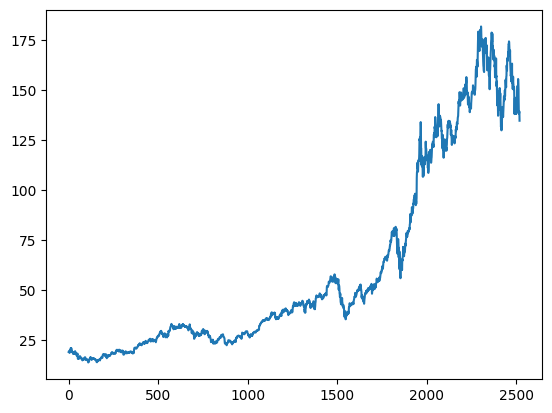

In [7]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [8]:
import numpy as np

In [9]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [10]:
df1.shape

(2519, 1)

In [11]:
#spliting data into training and testing
training_size=int(len(df1)*0.70)
test_size = len(df1) - training_size
train_data,test_data = df1[:training_size,:],df1[training_size:,:]

In [12]:
def create_dataset(dataset, time_step=1):
    dataX,dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step),0]
        dataX.append(a)
        dataY.append(dataset[i+time_step,0])
    return np.array(dataX), np.array(dataY)

In [13]:
time_step =100
X_train, Y_train = create_dataset(train_data,time_step)
X_test, Y_test = create_dataset(test_data,time_step)

In [77]:
import pandas as pd
Y_train

array([0.00694257, 0.00758221, 0.00774584, ..., 0.29950169, 0.2996653 ,
       0.30292302])

In [14]:
print(X_test)

[[0.30704354 0.3066865  0.31042024 ... 0.27537376 0.28135366 0.27611753]
 [0.3066865  0.31042024 0.30769806 ... 0.28135366 0.27611753 0.30744516]
 [0.31042024 0.30769806 0.31233918 ... 0.27611753 0.30744516 0.30292302]
 ...
 [0.70695425 0.72284118 0.69088881 ... 0.81340274 0.77996283 0.74336934]
 [0.72284118 0.69088881 0.69981407 ... 0.77996283 0.74336934 0.74039425]
 [0.69088881 0.69981407 0.72545927 ... 0.74336934 0.74039425 0.7436073 ]]


In [15]:
X_train = X_train.reshape(X_train.shape[0],X_train.shape[1],1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1],1)

In [34]:
### Create LSTM
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
import tensorflow as tf

In [35]:
model = Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam',metrics=[tf.keras.metrics.MeanAbsoluteError()])


In [36]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_12 (LSTM)              (None, 100, 50)           10400     
                                                                 
 lstm_13 (LSTM)              (None, 100, 50)           20200     
                                                                 
 lstm_14 (LSTM)              (None, 50)                20200     
                                                                 
 dense_4 (Dense)             (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [37]:
history = model.fit(X_train,Y_train,validation_data=(X_test,Y_test),epochs=100,batch_size=len(X_train),verbose=1)

Epoch 1/100
1/1 [==============================] - 5s 5s/step - loss: 0.0216 - mean_absolute_error: 0.1258 - val_loss: 0.5308 - val_mean_absolute_error: 0.7110
Epoch 2/100
1/1 [==============================] - 1s 973ms/step - loss: 0.0146 - mean_absolute_error: 0.0993 - val_loss: 0.4326 - val_mean_absolute_error: 0.6411
Epoch 3/100
1/1 [==============================] - 1s 953ms/step - loss: 0.0096 - mean_absolute_error: 0.0780 - val_loss: 0.3424 - val_mean_absolute_error: 0.5693
Epoch 4/100
1/1 [==============================] - 1s 965ms/step - loss: 0.0059 - mean_absolute_error: 0.0587 - val_loss: 0.2532 - val_mean_absolute_error: 0.4882
Epoch 5/100
1/1 [==============================] - 1s 950ms/step - loss: 0.0033 - mean_absolute_error: 0.0451 - val_loss: 0.1664 - val_mean_absolute_error: 0.3938
Epoch 6/100
1/1 [==============================] - 1s 952ms/step - loss: 0.0025 - mean_absolute_error: 0.0431 - val_loss: 0.0972 - val_mean_absolute_error: 0.2983
Epoch 7/100
1/1 [========

In [38]:
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

21/21 [==============================] - 1s 28ms/step


In [39]:
test_predict=scaler.inverse_transform(test_predict)
train_predict=scaler.inverse_transform(train_predict)

In [92]:
import math
from sklearn.metrics import mean_squared_error,mean_absolute_error


34.94567614929687

In [95]:
mean_squared_error(Y_train,train_predict)  #MSE

1221.2002815315361

In [97]:
mean_squared_error(Y_test,test_predict)

18318.572764136592

In [98]:
math.sqrt(mean_squared_error(Y_train,train_predict))  #RSME

34.94567614929687

In [87]:
math.sqrt(mean_squared_error(Y_test,test_predict)) #RMSE

135.34612208754484

In [93]:
mean_absolute_error(Y_train,train_predict) #MAE Train

33.037374537111944

In [94]:
mean_absolute_error(Y_test,test_predict)

132.8368924408491

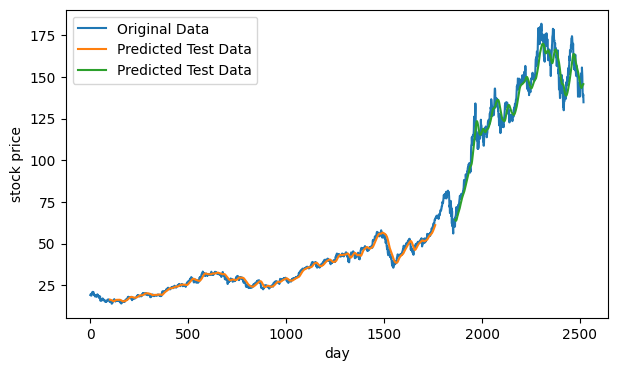

In [101]:
#plotting
lookback=100
#shift train prediction for plotting
trainPredictPlot = np.empty_like(df1)
trainPredictPlot[:,:] = np.nan
trainPredictPlot[lookback:len(train_predict)+lookback,:] = train_predict
#shift test prediction for plotting
testPredictPlot = np.empty_like(df1)
testPredictPlot[:,:] = np.nan
testPredictPlot[len(train_predict)+lookback*2+1:-1,:] = test_predict
plt.figure(figsize=(7,4))
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.xlabel('day')
plt.ylabel('stock price')
plt.legend(["Original Data","Predicted Test Data", "Predicted Test Data"])
plt.show()

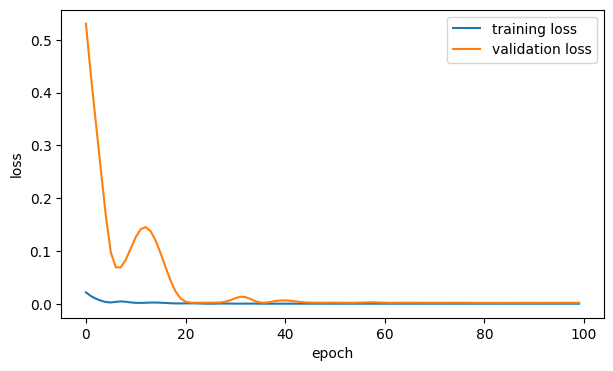

In [100]:
plt.figure(figsize=(7,4))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['training loss','validation loss',])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

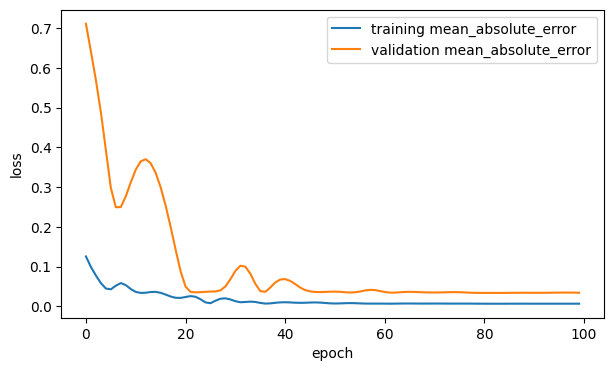

In [99]:
plt.figure(figsize=(7,4))
plt.plot(history.history['mean_absolute_error'])
plt.plot(history.history['val_mean_absolute_error'])
plt.legend(['training mean_absolute_error','validation mean_absolute_error',])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()